In [2]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [3]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = [
    "JetBrainsMono Nerd Font Mono",
    "Product Sans",
    "Helvetica",
]
plt.rcParams["font.size"] = 14

# Part I (NBA)


In [ ]:
##load dataset nba.csv using pandas
df = pd.read_csv("./datasets/nba.csv")
print("Dataset Overview:\n")
df.head()

Dataset Overview:



,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [5]:
print("\tDimension of dataset-> ", df.shape)

	Dimension of dataset->  (458, 9)


In [6]:
print("Columns in the dataset:\n")
df.columns
pd.DataFrame(df.columns, columns=["Columns"])

Columns in the dataset:



,Columns
0,Name
1,Team
2,Number
3,Position
4,Age
5,Height
6,Weight
7,College
8,Salary


In [7]:
print("Column Data Types:")
df.dtypes
pd.DataFrame(df.dtypes, columns=["Data Types"])

Column Data Types:


,Data Types
Name,object
Team,object
Number,float64
Position,object
Age,float64
Height,object
Weight,float64
College,object
Salary,float64


In [8]:
print("\nMissing Values:")
pd.DataFrame(df.isnull().sum(), columns=["Missing"])


Missing Values:


,Missing
Name,1
Team,1
Number,1
Position,1
Age,1
Height,1
Weight,1
College,85
Salary,12


In [9]:
print("Statistical description of dataset: ")
description = df.describe(include=["float"])  # Summary only for float columns
np.round(description, 2)  # Rounded to 2 decimal places

Statistical description of dataset: 


,Number,Age,Weight,Salary
count,457.00,457.00,457.00,446.00
mean,17.68,26.94,221.52,4842684.11
std,15.97,4.40,26.37,5229237.60
min,0.00,19.00,161.00,30888.00
25%,5.00,24.00,200.00,1044792.25
50%,13.00,26.00,220.00,2839073.00
75%,25.00,30.00,240.00,6500000.00
max,99.00,40.00,307.00,25000000.00


In [10]:
print("\nDataset Information:\n")
df.info()


Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB


In [11]:
# Checking and visualizing missing values
df.isnull()  # Identifies missing values

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...
453,False,False,False,False,False,False,False,False,False
454,False,False,False,False,False,False,False,True,False
455,False,False,False,False,False,False,False,True,False
456,False,False,False,False,False,False,False,False,False


<Axes: >

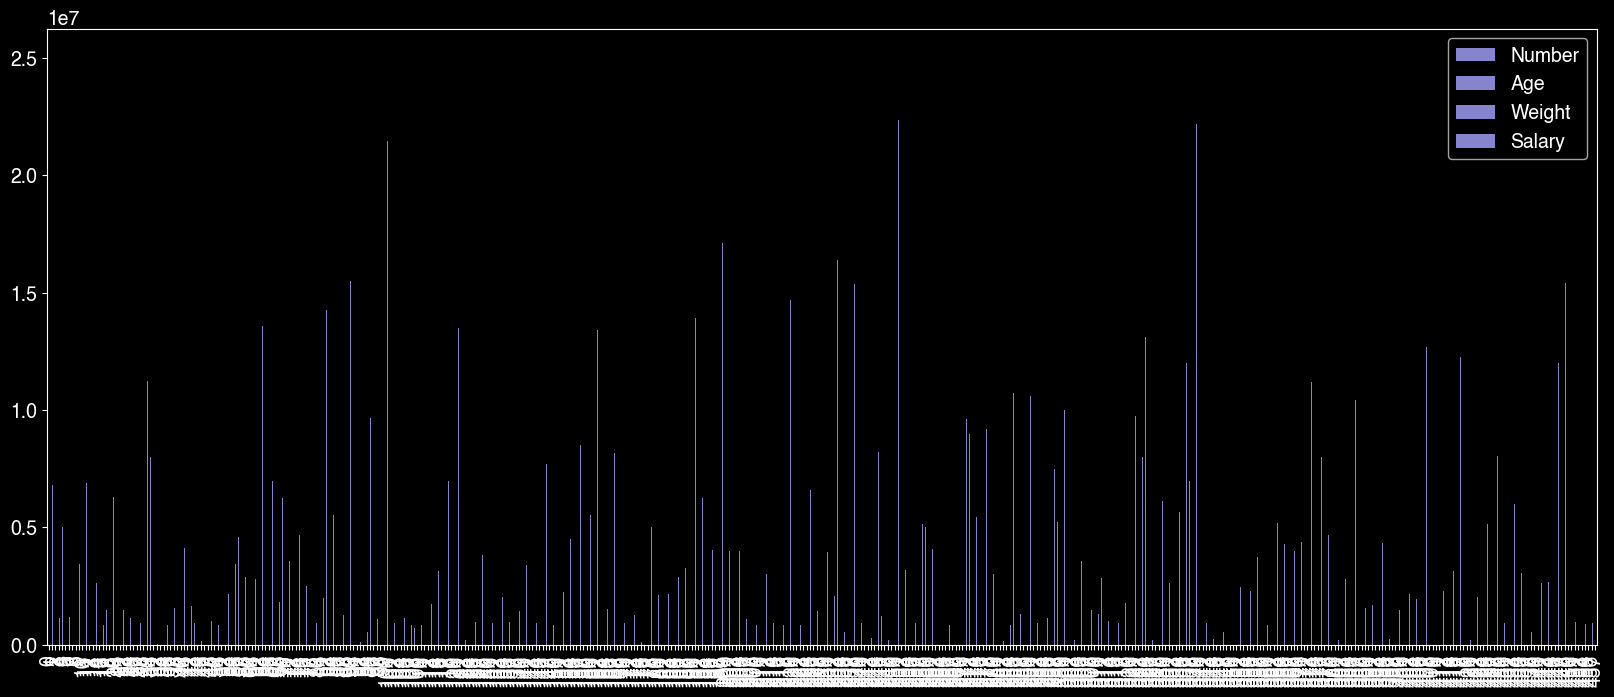

In [12]:
df.isnull().sum()  # Counts missing values in each column
df.plot.bar(
    figsize=(20, 8), color="#8684CF"
)  # Plot a bar graph (this may not be meaningful for a DataFrame)

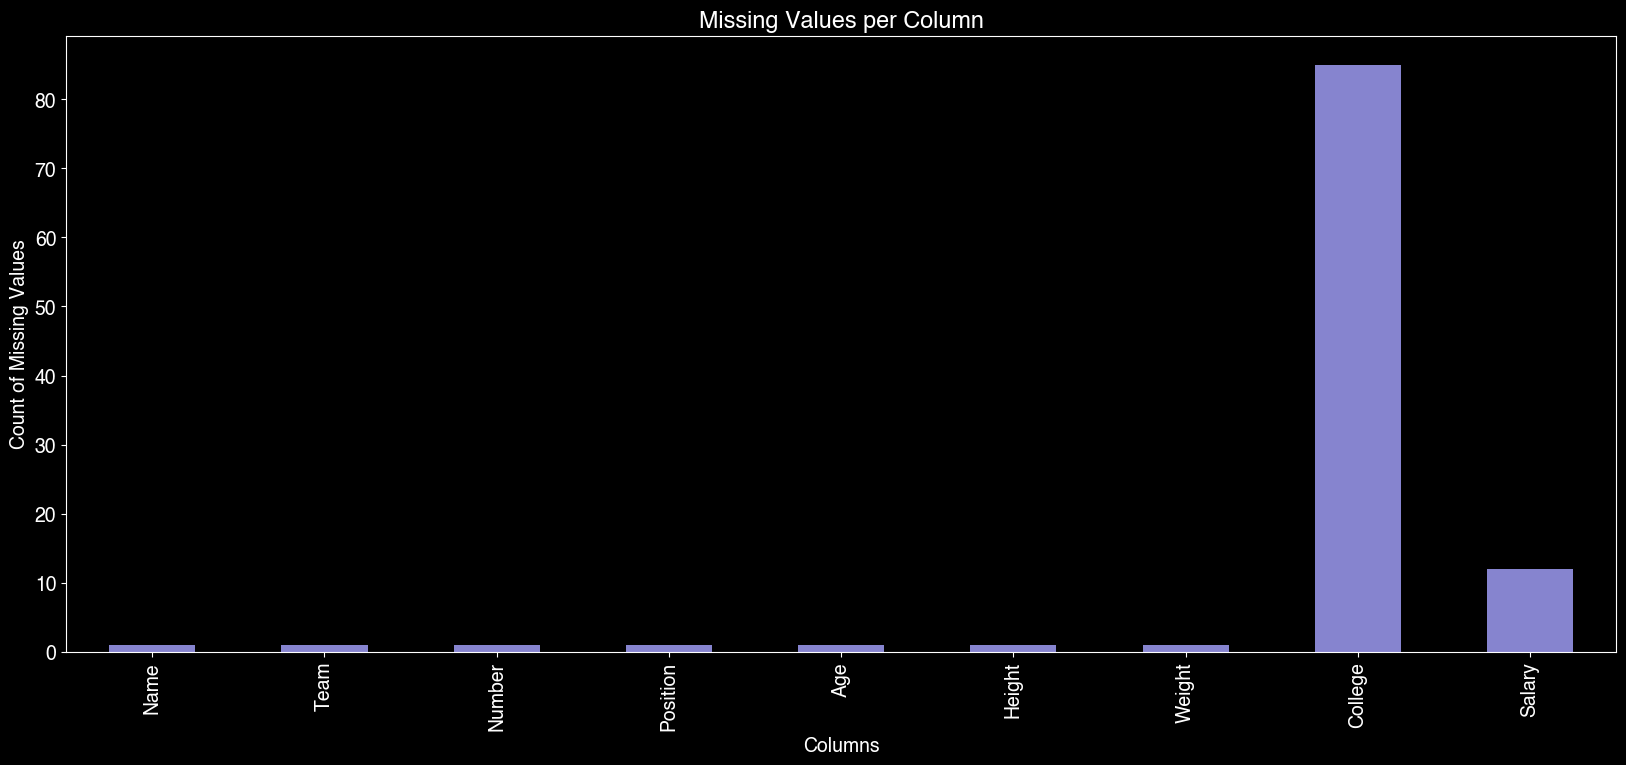

In [13]:
df.isnull().sum().plot.bar(
    figsize=(20, 8), color="#8684CF", title="Missing Values per Column"
)
plt.ylabel("Count of Missing Values")
plt.xlabel("Columns")
plt.show()

In [14]:
# Handling missing values
df = df.dropna()  # Drop rows with missing values
df = df.copy()
mean_salary = df["Salary"].mean()  # Calculate mean salary
df["Salary"] = df["Salary"].fillna(mean_salary)
print("Null values after update: ", df["Salary"].isnull().sum())
df.isna().sum()  # Check remaining missing values
pd.DataFrame(df.isna().sum(), columns=["Null Count"])

Null values after update:  0


,Null Count
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,0
Salary,0


In [15]:
df = df.copy()

# Convert numerical columns to integers
df["Number"] = pd.to_numeric(df["Number"], errors="coerce").fillna(0).astype(int)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce").fillna(0).astype(int)
df["Weight"] = pd.to_numeric(df["Weight"], errors="coerce").fillna(0).astype(int)
df["Salary"] = pd.to_numeric(df["Salary"], errors="coerce").fillna(0).astype(int)

# Convert categorical columns to 'category' type
df["Team"] = df["Team"].astype("category")
df["Position"] = df["Position"].astype("category")
df["College"] = df["College"].astype("category")

In [16]:
def convert_height_to_cm(height_str):
    if "-" in height_str:
        feet, inches = height_str.split("-")
    elif "'" in height_str:
        feet, inches = height_str.split("'")
        inches = inches.replace('"', "")
    else:
        feet = height_str.replace('"', "")
        inches = 0

    feet = int(feet)
    inches = int(inches)

    height_cm = (feet * 30) + (inches * 2.5)
    return height_cm


df["Height"] = df["Height"].apply(convert_height_to_cm)
df["Height"] = df["Height"].astype(int)
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,185,180,Texas,7730337
1,Jae Crowder,Boston Celtics,99,SF,25,195,235,Marquette,6796117
3,R.J. Hunter,Boston Celtics,28,SG,22,192,185,Georgia State,1148640
6,Jordan Mickey,Boston Celtics,55,PF,21,200,235,LSU,1170960
7,Kelly Olynyk,Boston Celtics,41,C,25,210,238,Gonzaga,2165160
...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5,SG,23,200,206,Duke,1348440
451,Chris Johnson,Utah Jazz,23,SF,26,195,206,Dayton,981348
452,Trey Lyles,Utah Jazz,41,PF,20,205,234,Kentucky,2239800
453,Shelvin Mack,Utah Jazz,8,PG,26,187,203,Butler,2433333


In [17]:
pd.DataFrame(df.isnull().sum(), columns=["Nulls"])

,Nulls
Name,0
Team,0
Number,0
Position,0
Age,0
Height,0
Weight,0
College,0
Salary,0


In [18]:
# Additional data type handling

df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df.info()  # Check data types after conversion

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 456
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Name      364 non-null    object  
 1   Team      364 non-null    category
 2   Number    364 non-null    int64   
 3   Position  364 non-null    category
 4   Age       364 non-null    int64   
 5   Height    364 non-null    int64   
 6   Weight    364 non-null    int64   
 7   College   364 non-null    category
 8   Salary    364 non-null    int64   
dtypes: category(3), int64(5), object(1)
memory usage: 27.4+ KB


In [19]:
height_counts_df = pd.DataFrame(df["Height"].value_counts()).reset_index()
height_counts_df.columns = ["Height", "Count"]
height_counts_df

,Height,Count
0,202,49
1,197,37
2,200,36
3,195,36
4,205,32
5,207,29
6,192,29
7,190,28
8,187,25
9,210,20


In [ ]:
# Define the breakpoints (bins) and labels
bins = [171, 181, 191, 201, 211, 221]  # The bin edges
labels = [
    "171-180",
    "181-190",
    "191-200",
    "201-210",
    "211-220",
]

# Categorize 'Height' into these bins
df["HeightGroup"] = pd.cut(df["Height"], bins=bins, labels=labels, right=False)
df

,Name,Team,Number,Position,Age,Height,Weight,College,Salary,HeightGroup
0,Avery Bradley,Boston Celtics,0,PG,25,185,180,Texas,7730337,181-190
1,Jae Crowder,Boston Celtics,99,SF,25,195,235,Marquette,6796117,191-200
3,R.J. Hunter,Boston Celtics,28,SG,22,192,185,Georgia State,1148640,191-200
6,Jordan Mickey,Boston Celtics,55,PF,21,200,235,LSU,1170960,191-200
7,Kelly Olynyk,Boston Celtics,41,C,25,210,238,Gonzaga,2165160,201-210
...,...,...,...,...,...,...,...,...,...,...
449,Rodney Hood,Utah Jazz,5,SG,23,200,206,Duke,1348440,191-200
451,Chris Johnson,Utah Jazz,23,SF,26,195,206,Dayton,981348,191-200
452,Trey Lyles,Utah Jazz,41,PF,20,205,234,Kentucky,2239800,201-210
453,Shelvin Mack,Utah Jazz,8,PG,26,187,203,Butler,2433333,181-190


In [21]:
height_grp_counts_df = pd.DataFrame(df["HeightGroup"].value_counts()).reset_index()
height_grp_counts_df.columns = ["Height Group", "Count"]
height_grp_counts_df

,Height Group,Count
0,191-200,138
1,201-210,130
2,181-190,78
3,171-180,14
4,211-220,4


In [22]:
bins = [19, 26, 33, 40]  ## breakpoints
labels = ["19-25", "26-35", "33-40"]  ##define intervals
df["AgeGroup"] = pd.cut(
    df["Age"], bins=bins, labels=labels, right=False
)  ##print according to intervals and exclude upper bound

In [23]:
##count its values
age_grp_counts_df = pd.DataFrame(df["AgeGroup"].value_counts()).reset_index()
age_grp_counts_df.columns = ["AgeGroup", "Count"]
age_grp_counts_df

,AgeGroup,Count
0,19-25,169
1,26-35,157
2,33-40,36


In [24]:
position_counts_df = pd.DataFrame(
    df.groupby("Position", observed=False)["Salary"].median()
).reset_index()
position_counts_df.columns = ["Position", "Median"]
round(position_counts_df, 2)

,Position,Median
0,C,3398280.0
1,PF,2850000.0
2,PG,2927470.0
3,SF,2000000.0
4,SG,1500000.0


In [25]:
age_grp_counts_df = pd.DataFrame(
    df.groupby("AgeGroup", observed=False)["Salary"].median()
).reset_index()
age_grp_counts_df.columns = ["AgeGroup", "Median"]
round(age_grp_counts_df, 2)

,AgeGroup,Median
0,19-25,1535880.0
1,26-35,4775000.0
2,33-40,2854940.0


In [26]:
team_counts_df = pd.DataFrame(
    df.groupby("Team", observed=False)["Salary"].median().head(10)
).reset_index()
team_counts_df.columns = ["Team", "Median"]
round(team_counts_df, 2)

,Team,Median
0,Atlanta Hawks,2854940.0
1,Boston Celtics,2593117.5
2,Brooklyn Nets,1140240.0
3,Charlotte Hornets,3034356.0
4,Chicago Bulls,2315220.0
5,Cleveland Cavaliers,2100000.0
6,Dallas Mavericks,3017992.0
7,Denver Nuggets,3000000.0
8,Detroit Pistons,2891760.0
9,Golden State Warriors,3844199.0


In [27]:
position_counts_df = pd.DataFrame(
    df.groupby("Position", observed=False)["Salary"].mean()
).reset_index()
position_counts_df.columns = ["Position", "Mean"]
round(position_counts_df, 2)

,Position,Mean
0,C,5763866.84
1,PF,4459987.91
2,PG,4916069.18
3,SF,4595907.62
4,SG,3887057.87


In [28]:
position_counts_df = pd.DataFrame(
    df.groupby("AgeGroup", observed=False)["Salary"].mean()
).reset_index()
position_counts_df.columns = ["Age Group", "Mean"]
round(position_counts_df, 2)

,Age Group,Mean
0,19-25,3044838.31
1,26-35,6597872.98
2,33-40,3495798.53


In [29]:
position_counts_df = pd.DataFrame(
    df.groupby("Team", observed=False)["Salary"].mean().head(10)
).reset_index()
position_counts_df.columns = ["Team", "Mean"]
round(position_counts_df, 2)

,Team,Mean
0,Atlanta Hawks,5125754.55
1,Boston Celtics,3461755.67
2,Brooklyn Nets,3654086.54
3,Charlotte Hornets,3978124.15
4,Chicago Bulls,6105483.33
5,Cleveland Cavaliers,6733471.73
6,Dallas Mavericks,4761692.08
7,Denver Nuggets,4240885.67
8,Detroit Pistons,4477884.20
9,Golden State Warriors,6711293.08


In [30]:
df.groupby("Position", observed=False)["Salary"].describe()

,count,mean,std,min,25%,50%,75%,max
Position,,,,,,,,
C,49.0,5.763867e+06,5.786112e+06,83397.0,1276000.0,3398280.0,7700000.00,19689000.0
PF,81.0,4.459988e+06,4.983202e+06,111444.0,1035000.0,2850000.0,5464000.00,22192730.0
PG,76.0,4.916069e+06,5.043854e+06,55722.0,1291350.0,2927470.0,6934651.75,21468695.0
SF,71.0,4.595908e+06,5.446876e+06,200600.0,990674.0,2000000.0,5915702.00,22875000.0
SG,87.0,3.887058e+06,4.596175e+06,55722.0,947276.0,1500000.0,5675000.00,20000000.0


In [31]:
df.groupby("AgeGroup", observed=False)["Salary"].describe()

,count,mean,std,min,25%,50%,75%,max
AgeGroup,,,,,,,,
19-25,169.0,3.044838e+06,3.703168e+06,55722.0,947276.0,1535880.0,3272091.0,16407501.0
26-35,157.0,6.597873e+06,6.025423e+06,55722.0,1276000.0,4775000.0,10151612.0,22875000.0
33-40,36.0,3.495799e+06,3.580659e+06,200600.0,947276.0,2854940.0,4383750.0,20000000.0


In [32]:
df.groupby("Team", observed=False)["Salary"].describe().head(5)

,count,mean,std,min,25%,50%,75%,max
Team,,,,,,,,
Atlanta Hawks,11.0,5.125755e+06,5.725230e+06,525093.0,1152260.00,2854940.0,6873239.50,18671659.0
Boston Celtics,12.0,3.461756e+06,2.348162e+06,1148640.0,1805730.00,2593117.5,4272309.25,7730337.0
Brooklyn Nets,13.0,3.654087e+06,5.715357e+06,134215.0,947276.00,1140240.0,1500000.00,19689000.0
Charlotte Hornets,13.0,3.978124e+06,3.382346e+06,189455.0,947276.00,3034356.0,6110034.00,12000000.0
Chicago Bulls,12.0,6.105483e+06,6.844639e+06,845059.0,1297225.25,2315220.0,9725000.00,20093064.0


In [ ]:
# Group the data by "Position" and aggregate salary
salaries_per_position = (
    df.groupby("Position", observed=False)["Salary"].apply(list).reset_index()
)

salaries_per_position_df = pd.DataFrame(salaries_per_position)
salaries_per_position_df

,Position,Salary
0,C,"[2165160, 2569260, 2616975, 19689000, 947276, ..."
1,PF,"[1170960, 1140240, 947276, 981348, 11235955, 1..."
2,PG,"[7730337, 1824360, 3431040, 6912869, 6300000, ..."
3,SF,"[6796117, 22875000, 845059, 1636842, 1000000, ..."
4,SG,"[1148640, 3425510, 1749840, 845059, 1500000, 1..."


In [34]:
# Group the data by "Position" and aggregate salary
salaries_per_age_gp = (
    df.groupby("AgeGroup", observed=False)["Salary"].apply(list).reset_index()
)

# Convert the result to a DataFrame (if you haven't done so yet)
salaries_per_age_gp_df = pd.DataFrame(salaries_per_age_gp)

# Display the result
salaries_per_age_gp_df

,AgeGroup,Salary
0,19-25,"[7730337, 6796117, 1148640, 1170960, 2165160, ..."
1,26-35,"[6912869, 3425510, 2616975, 1500000, 6300000, ..."
2,33-40,"[1635476, 5675000, 3376000, 947276, 1449187, 4..."


# Part II (Iris Dataset)


In [ ]:
##load dataset iris.csv
iris_df = pd.read_csv("./datasets/iris.csv")
print("Dataset Overview:\n")
iris_df.head()

Dataset Overview:



,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [36]:
# Display the shape of the dataset
print("Dimension of dataset -> ", iris_df.shape)

Dimension of dataset ->  (150, 5)


In [37]:
# List all column names
print("Columns in the dataset:")
pd.DataFrame(iris_df.columns, columns=["Columns"])

Columns in the dataset:


,Columns
0,sepal_length
1,sepal_width
2,petal_length
3,petal_width
4,species


In [38]:
# Check the data types of each column
print("\nColumn Data Types:")
pd.DataFrame(iris_df.dtypes, columns=["Data Types"])


Column Data Types:


,Data Types
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [39]:
# Display summary statistics for numerical columns
print("\nStatistical description of dataset: ")
description = iris_df.describe(include=["float"])  # Summary only for float columns
np.round(description, 2)  # Rounded to 2 decimal places


Statistical description of dataset: 


,sepal_length,sepal_width,petal_length,petal_width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [40]:
# Dataset information (data types, non-null counts, etc.)
print("\nDataset Information:")
iris_df.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
# Checking and visualizing missing values
iris_df.isnull()  # Identifies missing values

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [42]:
# Check for missing values
print("\nMissing Values:")
pd.DataFrame(iris_df.isnull().sum(), columns=["Nulls"])


Missing Values:


,Nulls
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [43]:
iris_df = iris_df.copy()
iris_df["sepal_length"] = pd.to_numeric(iris_df["sepal_length"], errors="coerce")
iris_df["sepal_width"] = pd.to_numeric(iris_df["sepal_width"], errors="coerce")
iris_df["petal_length"] = pd.to_numeric(iris_df["petal_length"], errors="coerce")
iris_df["petal_width"] = pd.to_numeric(iris_df["petal_width"], errors="coerce")
pd.DataFrame(iris_df.dtypes, columns=["Data Types"])

,Data Types
sepal_length,float64
sepal_width,float64
petal_length,float64
petal_width,float64
species,object


In [44]:
# Convert categorical columns to 'category' type
iris_df["species"] = iris_df["species"].astype("category")
print("\nUpdated DataFrame:")
iris_df


Updated DataFrame:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [45]:
# Display a count of the 'species' column
print("\nSpecies Distribution:")
species_counts_df = pd.DataFrame(
    pd.DataFrame(iris_df["species"].value_counts())
).reset_index()
species_counts_df.columns = ["Species", "Count"]
species_counts_df


Species Distribution:


,Species,Count
0,setosa,50
1,versicolor,50
2,virginica,50


In [46]:
# Summary statistics grouped by species
print("\nStatistical description by Species:")
iris_df.groupby("species", observed=False).describe()


Statistical description by Species:


sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

<Figure size 1600x900 with 0 Axes>

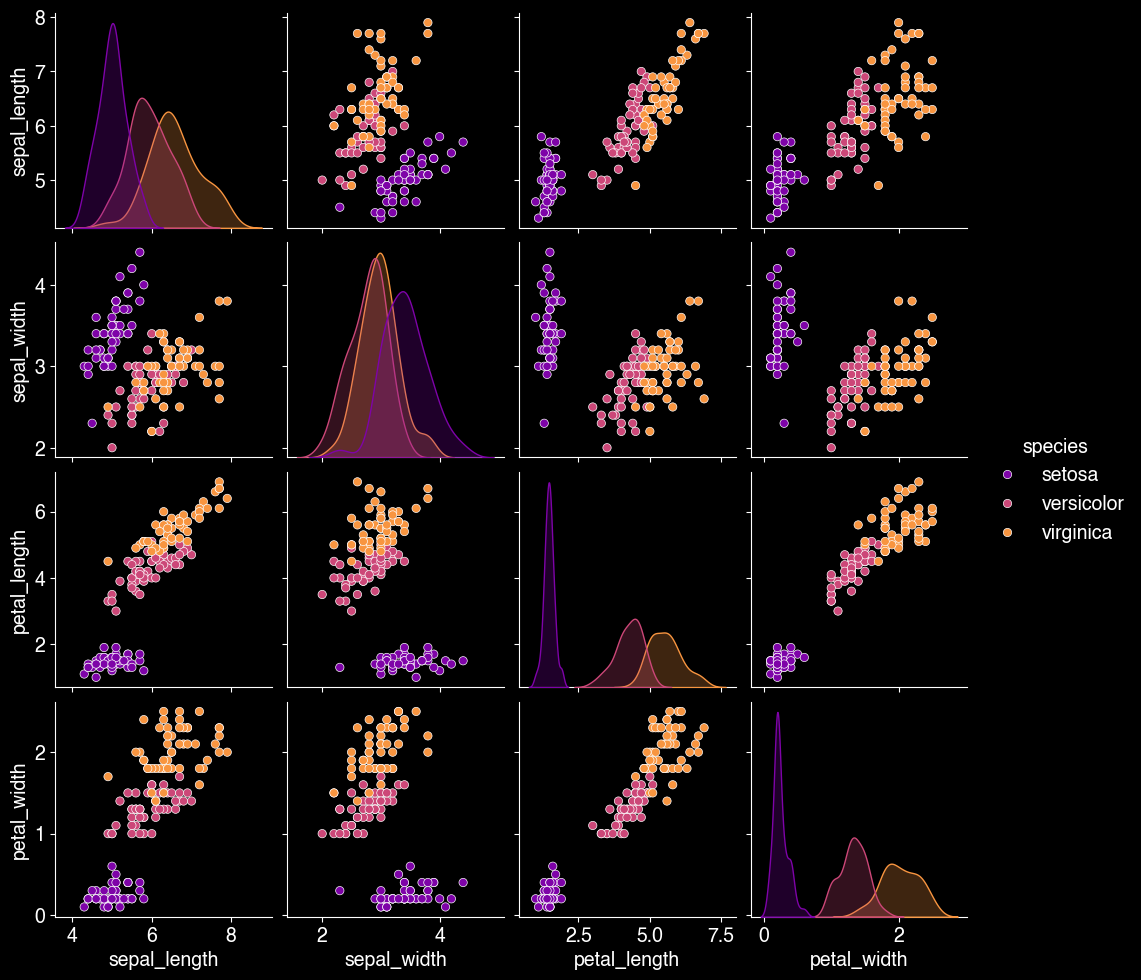

In [47]:
# Visualizing the distribution of numerical columns based on species
plt.figure(figsize=(16, 9))
sns.pairplot(iris_df, hue="species", palette="plasma")
plt.show()

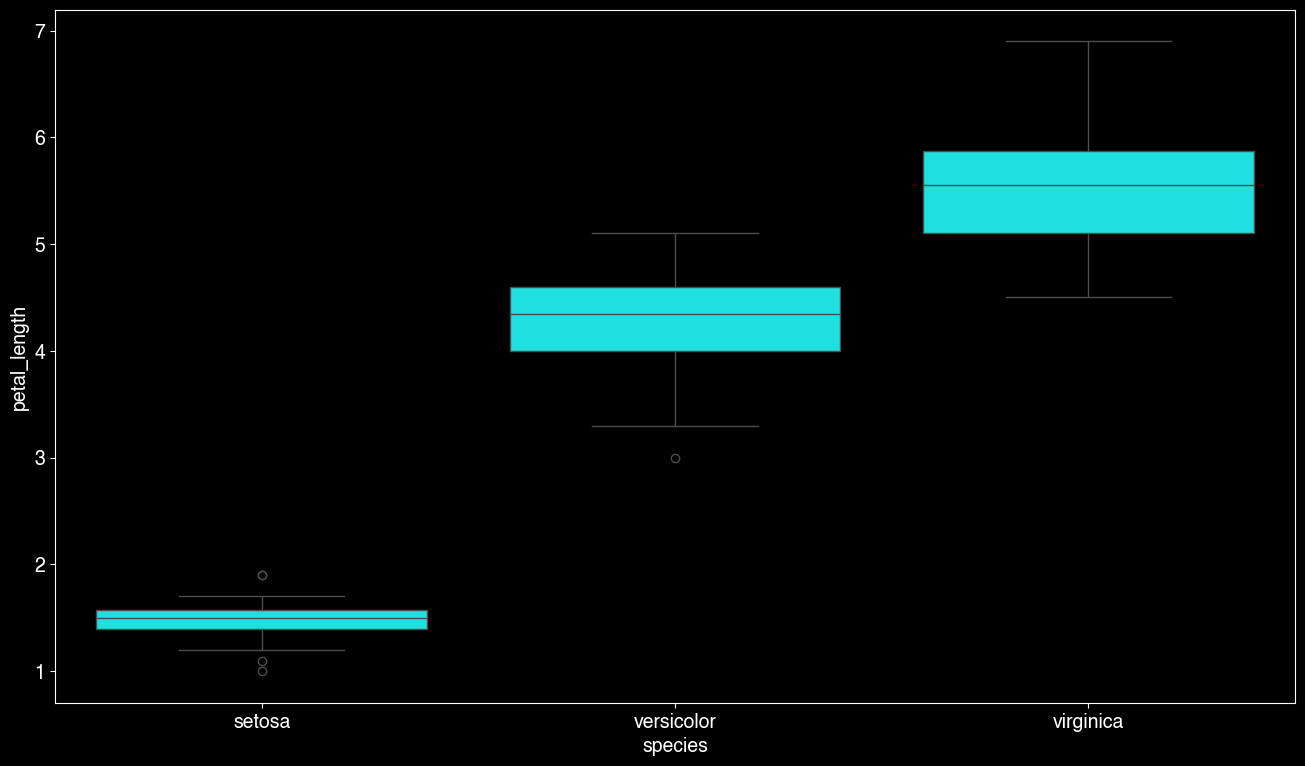

In [48]:
# Creating a boxplot to visualize the distribution of petal length by species
plt.figure(figsize=(16, 9))
sns.boxplot(x="species", y="petal_length", data=iris_df, color="cyan")
plt.show()

In [49]:
# Calculate mean and median of numerical columns grouped by species
print("\nMean of numerical columns grouped by species:")

iris_df.groupby("species", observed=False)[
    ["sepal_length", "sepal_width", "petal_length", "petal_width"]
].mean()


Mean of numerical columns grouped by species:


,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [50]:
# Convert numerical data into bins based on petal length
bins = [0, 2, 4, 6, 8]
labels = ["0-2", "2-4", "4-6", "6-8"]

iris_df["PetalLengthGroup"] = pd.cut(
    iris_df["petal_length"], bins=bins, labels=labels, right=False
)

In [51]:
# Display the updated DataFrame
print("\nUpdated DataFrame with Petal Length Group:")
iris_df


Updated DataFrame with Petal Length Group:


,sepal_length,sepal_width,petal_length,petal_width,species,PetalLengthGroup
0,5.1,3.5,1.4,0.2,setosa,0-2
1,4.9,3.0,1.4,0.2,setosa,0-2
2,4.7,3.2,1.3,0.2,setosa,0-2
3,4.6,3.1,1.5,0.2,setosa,0-2
4,5.0,3.6,1.4,0.2,setosa,0-2
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,4-6
146,6.3,2.5,5.0,1.9,virginica,4-6
147,6.5,3.0,5.2,2.0,virginica,4-6
148,6.2,3.4,5.4,2.3,virginica,4-6


In [52]:
# Group by Petal Length Group and calculate mean petal width
print("\nMean Petal Width per Petal Length Group:")
petal_len_counts_df = pd.DataFrame(
    iris_df.groupby("PetalLengthGroup", observed=False)["petal_width"].mean()
).reset_index()
petal_len_counts_df.columns = ["Petal Length Group", "Mean"]
round(petal_len_counts_df, 2)


Mean Petal Width per Petal Length Group:


,Petal Length Group,Mean
0,0-2,0.24
1,2-4,1.11
2,4-6,1.69
3,6-8,2.13


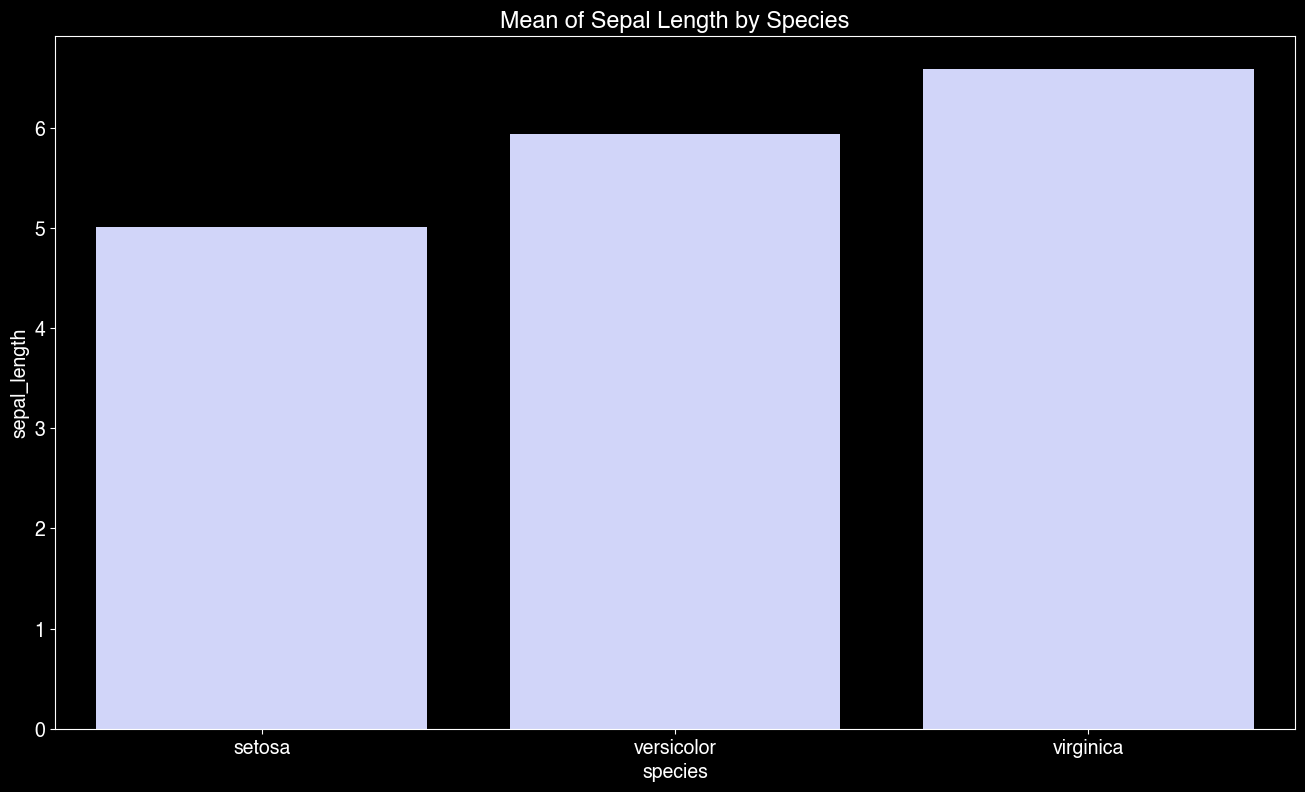

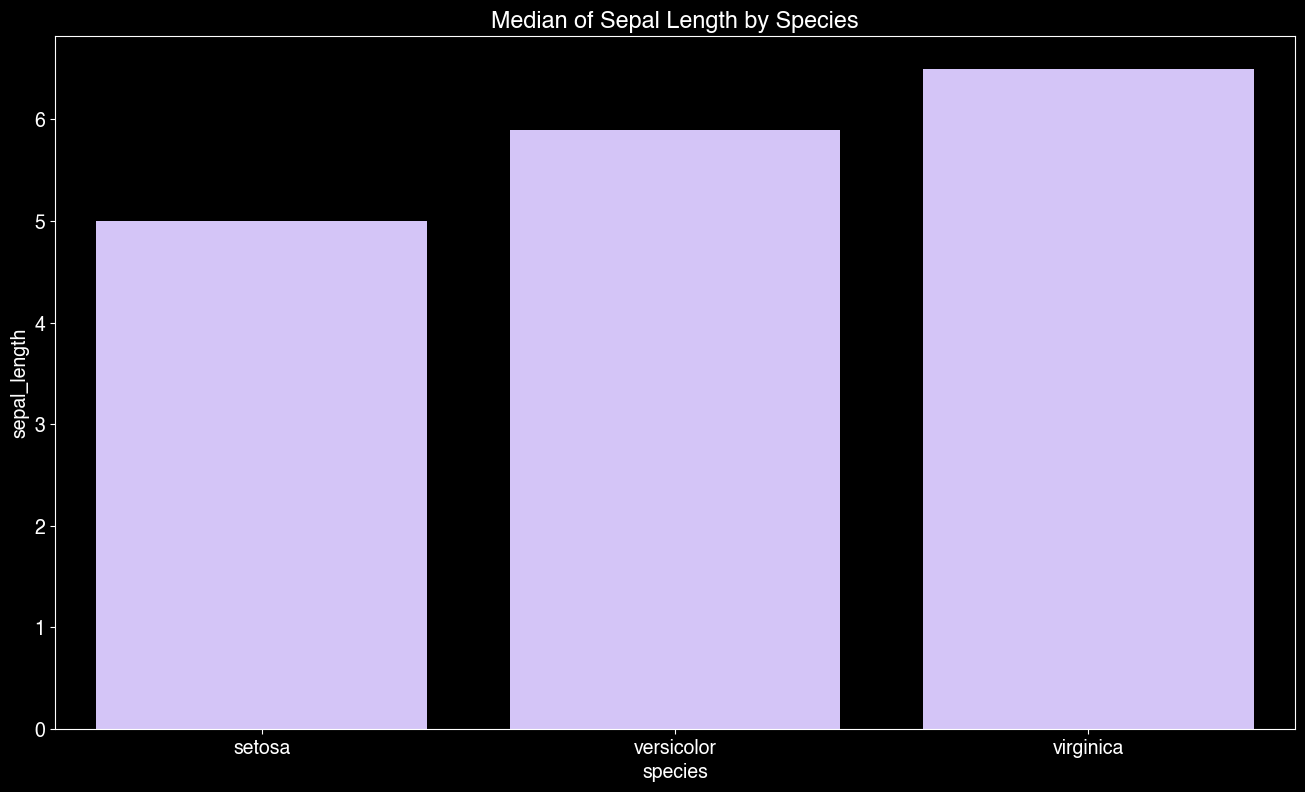

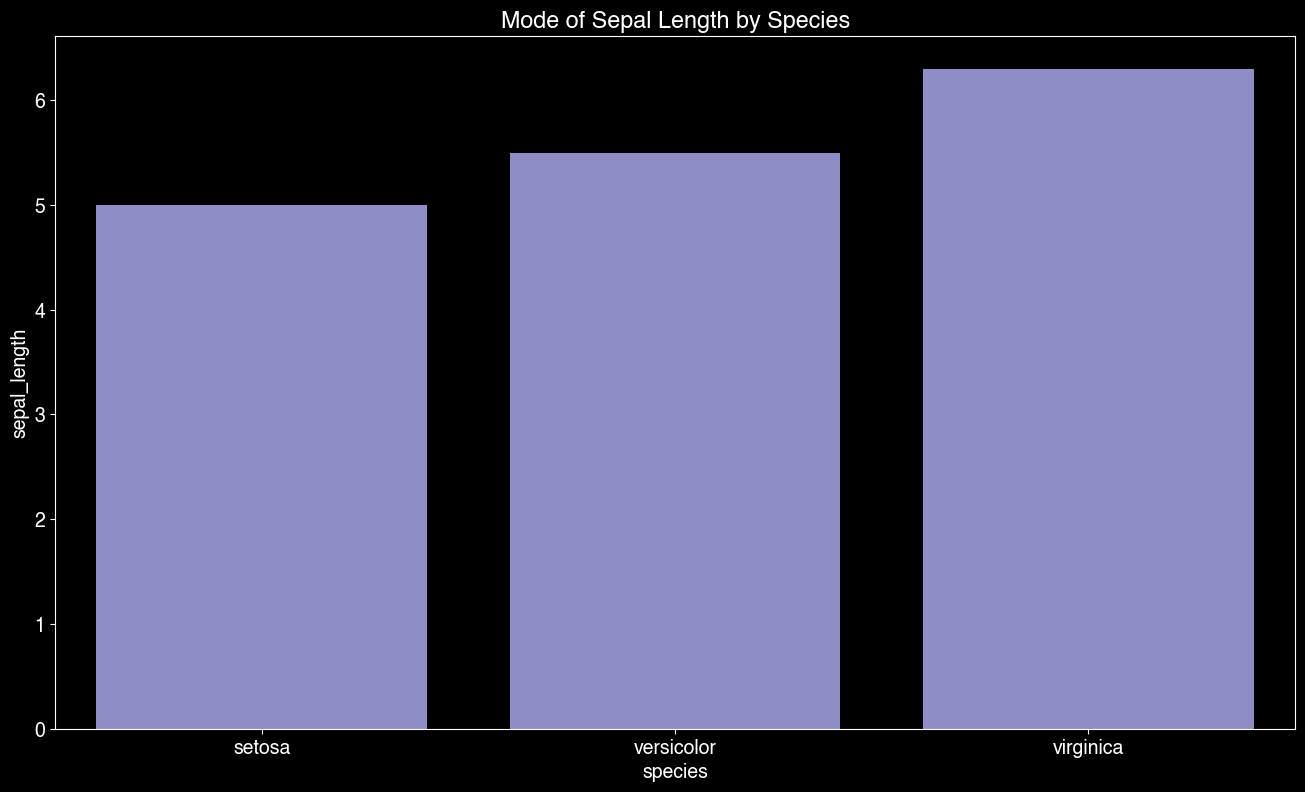

In [53]:
numeric_columns = iris_df.select_dtypes(include=["float64", "int64"]).columns
mean_values = iris_df.groupby("species", observed=False)[numeric_columns].mean()
median_values = iris_df.groupby("species", observed=False)[numeric_columns].median()
mode_values = iris_df.groupby("species", observed=False)[numeric_columns].agg(
    lambda x: x.mode()[0]
)

# 1. Plotting the Mean for Sepal Length
plt.figure(figsize=(16, 9))
sns.barplot(data=mean_values, x="species", y="sepal_length", color="#CBD0FF")
plt.title("Mean of Sepal Length by Species")
plt.show()
# 2. Plotting the Median for Sepal Length
plt.figure(figsize=(16, 9))
sns.barplot(data=median_values, x="species", y="sepal_length", color="#D1BDFF")
plt.title("Median of Sepal Length by Species")
plt.show()

# 3. Plotting the Mode for Sepal Length
plt.figure(figsize=(16, 9))
sns.barplot(data=mode_values, x="species", y="sepal_length", color="#8684CF")
plt.title("Mode of Sepal Length by Species")
plt.show()

# You can repeat the process for other features (petal_length, sepal_width, etc.)